**LENDING CLUB CASESTUDY**

In [ ]:
# Dataset - https://drive.google.com/file/d/1qOBO7LeKg8mJXu1ZVt1CZ5IxBgUR9lUG/view?usp=sharing

In [ ]:
# import the libraria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring hurmless warnings
import warnings
warnings.filterwarnings('ignore')

# Note book formating
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [ ]:
# Data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/loan - loan.csv')

# data shape
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 39719 rows and 111 columns.


In [ ]:
# data sample
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1.0,INDIVIDUAL,annual_inc_joint,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,annual_inc_joint,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Number of categorical and numerical features

num,obj = 0,0
for cols in data.columns:
  if data[cols].dtype != 'O':
    num+=1
  else:
    obj+=1

print(f'There are {num} numerical and {obj} categorical columns')

There are 86 numerical and 25 categorical columns


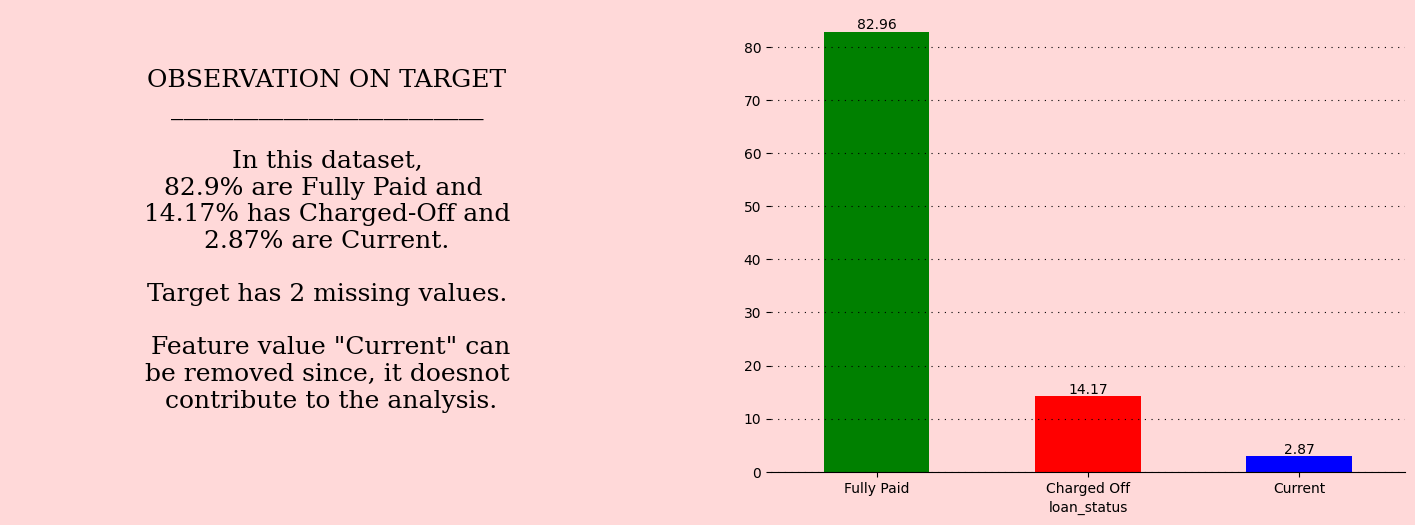

In [ ]:

# Understanding the target column

# create a plot structure
fig = plt.figure(figsize=(18, 6))
spec = fig.add_gridspec(1, 2)
sec_1 = fig.add_subplot(spec[0, 0])
sec_2 = fig.add_subplot(spec[0, 1])

# add color preference
for area in [fig, sec_1, sec_2]:
    area.set_facecolor('#ffd9d9')

# to drop missing values
# data.dropna(inplace=True)

# ploting the graph
ax = round(data['loan_status'].value_counts(normalize=True)*100, 2).plot.bar(color=['green', 'red', 'blue'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
sec_2.grid(axis='y', color='black', ls=':', dashes=(1, 5))

# Narrating the observation
m_vals = data['loan_status'].isnull().sum()
sec_1.text(0.5,0.5, f'OBSERVATION ON TARGET\n_________________________\n\nIn this dataset,\n\
82.9% are Fully Paid and \n14.17% has Charged-Off and\n2.87% are Current.\n\n\
Target has {m_vals} missing values.\n\n Feature value "Current" can\nbe removed since, it doesnot\n contribute to the analysis.',
           ha='center', va='center', size=18, fontfamily='serif')

# removing spines and axis
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)

for section in [sec_1,sec_2]:
  for position in ['top', 'right', 'bottom', 'left']:
    if section == sec_2 and position == 'bottom':
      continue
    else:
      section.spines[position].set_visible(False)


plt.show()

In [ ]:
# Treatment on target based on the observation
print('Number of unique values in the data before treatment:')
print(round(data['loan_status'].value_counts(normalize=True)*100, 2))

# remove the data where attribute value is "Current"
data = data[data['loan_status'] != 'Current']

# proportion of data after treatment
print('\nNumber of unique values in the data after treatment:')
print(round(data['loan_status'].value_counts(normalize=True)*100, 2))

Number of unique values in the data before treatment:
loan_status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: proportion, dtype: float64

Number of unique values in the data after treatment:
loan_status
Fully Paid     85.41
Charged Off    14.59
Name: proportion, dtype: float64


In [ ]:
# Duplicate Check
drows,dcols = data[data.duplicated()].shape
print('There are no duplicated in the data' if drows == 0 else f'There are {drows} duplicates in the data')

There are no duplicated in the data


In [ ]:
# Missing value check

mv_grt30_lst = []  # list to store feature with more than 30% missing value
mv_lst30_lst = []  # list to store feature with less than 30% missing value

for feature in data.columns:
    if round(data[feature].isnull().mean()*100, 2) >= 30:
        mv_grt30_lst.append(feature)
    elif 0.0000 < (data[feature].isnull().mean()*100) <= 30:
        mv_lst30_lst.append(feature)

print(f'There are {len(mv_grt30_lst)} feature that has more than 30% missing values.')
print(f'There are {len(mv_lst30_lst)} feature that has less than 30% missing values.')

There are 57 feature that has more than 30% missing values.
There are 53 feature that has less than 30% missing values.


In [ ]:
# Looping to find atttribute with one unique value
ufeat_lst = []

for feature in data.columns:
  if data[feature].nunique()==1:
    ufeat_lst.append(feature)

print(f'There are {len(ufeat_lst)} feature that has unique values.')

There are 12 feature that has unique values.


# OBSERVATION FROM THE DATA DICTIONARY

* Features such as **"id" , 'member_id', 'url'** has **entirely unique** value.
* Based on the description provided in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **out_prncp_inv** - Remaining outstanding principal for portion of total amount funded by investors
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **chargeoff_within_12_mths** - Number of charge-offs within 12 months.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **out_prncp** - Remaining outstanding principal for total amount funded.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received.
    * **collection_recovery_fee** - post charge off collection fee.
    * **collections_12_mths_ex_med** - Number of collections in 12 months excluding medical collections.
    * **tax_liens** - Number of tax liens.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
* These **21 features has no contribution** to analysis by its nature since most of them are **derived post-approval** of loan.


* We are in the **pursuit to find the driving factors pre-approval** of loan that leads the customers to default. So, the **above mentioned features can be removed** for further analysis.

In [ ]:
# List of features to remove
rmv_lst = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d',
           'total_rec_late_fee', 'chargeoff_within_12_mths', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal',
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee',
           'last_pymnt_amnt','recoveries', 'collections_12_mths_ex_med', 'tax_liens','earliest_cr_line', 'addr_state']


# consolidated list for removal
removal_lst = list(set(mv_grt30_lst + ufeat_lst + rmv_lst))


# count of the features to be removed
print('Number of features to remove:', len(removal_lst))

# Count of columns before removing
print(f'Number of features before removing: {data.shape[1]}')

# removing the features from the dataframe
for feature in removal_lst:
    del data[feature]

# count of the features after removal
print('Number of features after removal:', data.shape[1])


Number of features to remove: 88
Number of features before removing: 111
Number of features after removal: 23


In [ ]:
# Data validation and data cleaning

# Dataframe for missing value and datatype
data_desc = pd.DataFrame({'Missing_Val_Prop':round(data.isnull().mean()*100,2),
                          'DataType':data.dtypes})

# DataFrame for 2 Sample value
sample_data = data.head(2).T

data_val = pd.concat([data_desc,sample_data],axis=1)
data_val.rename(columns={0:'Sample_1',
                         1:'Sample_2'}, inplace = True)

data_val

,Missing_Val_Prop,DataType,Sample_1,Sample_2
loan_amnt,0.01,float64,5000.0,2500.0
funded_amnt,0.01,float64,5000.0,2500.0
funded_amnt_inv,0.01,float64,4975.0,2500.0
term,0.01,object,36 months,60 months
int_rate,0.01,object,10.65%,15.27%
installment,0.01,float64,162.87,59.83
grade,0.01,object,B,C
sub_grade,0.01,object,B2,C4
emp_length,2.68,object,10+ years,< 1 year
home_ownership,0.01,object,RENT,RENT


# Observation

* From the above Dataframe,
    * Its intutive to remove percentage sign from **"int_rate", "revol_util"** and convert them to numeric data type for further analysis.
    * Two derived columns namely 'issue_year' and 'issue_month' can be derived from **"issue_d"**.
    * **"emp_length", "revol_util", "pub_rec_bankruptcies"** has missing values and it has to be treated.

In [ ]:
# Curing 'int_rate' and '' columns

# using the strip function to remove percentage sign
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')

# type casting
# before typecasting
print('Datatype before typecasting:')
print(data[['int_rate','revol_util']].dtypes)

# casting to numerical datatype (float)
data[['int_rate','revol_util']] = data[['int_rate','revol_util']].apply(pd.to_numeric)

# After typecasting
print('\nDatatype After typecasting:')
print(data[['int_rate','revol_util']].dtypes)

Datatype before typecasting:
int_rate      object
revol_util    object
dtype: object

Datatype After typecasting:
int_rate      float64
revol_util    float64
dtype: object


In [ ]:
# sample data after typecasting
data[['int_rate', 'revol_util']].head(7)

,int_rate,revol_util
0,10.65,83.7
1,15.27,9.4
2,15.96,98.5
3,13.49,21.0
5,7.90,28.3
6,15.96,85.6
7,18.64,87.5


In [ ]:
# sample data before casting
print('Datatype Before Casting:')
print(data['issue_d'].head())

# datatype casting to datetime datatype
data['issue_d']=pd.to_datetime(data['issue_d'], format='%b-%y') # format : format of the input data

# data after casting
print('\nDatatype After Casting:')
print(data['issue_d'].head())

Datatype Before Casting:
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Datatype After Casting:
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


In [ ]:
# Lets Derive the issue year and issue month

# Derive the Year Attribute
data['issue_year'] = data['issue_d'].dt.year

# Derive the Month Attribute
data['issue_month'] = data['issue_d'].dt.month

# data sample with derived columns
print("Sample of the derived columns:")
print(data[['issue_d','issue_year','issue_month']].head())

Sample of the derived columns:
     issue_d  issue_year  issue_month
0 2011-12-01      2011.0         12.0
1 2011-12-01      2011.0         12.0
2 2011-12-01      2011.0         12.0
3 2011-12-01      2011.0         12.0
5 2011-12-01      2011.0         12.0


# Missing value treatment

In [ ]:
# Datatype of Missing values
print('Attribute with missing values and its datatype')
msng_cols = []
for cols in data.columns:
    if data[cols].isnull().sum() > 0:
        msng_cols.append(cols)
print(data[msng_cols].dtypes)

# Number of unique values in these attributes
print(data[msng_cols].nunique())

# mean and median for revol_util
rev_mean = data['revol_util'].mean()
rev_median = data['revol_util'].median()

print(f'\nFor revol_util Mean is{round(rev_mean,2)} and Median {rev_median}')

Attribute with missing values and its datatype
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
inq_last_6mths                 float64
open_acc                       float64
pub_rec                        float64
revol_util                     float64
total_acc                      float64
total_pymnt_inv                float64
pub_rec_bankruptcies           float64
issue_year                     float64
issue_month      

# Observation

* Since emp_length is categorical feature missing value can be replaced with mode.
* Even pub_rec_bankruptcies is numerical it has just three unique values and mode acts as best estimator for replacement.
* For revol_util we can replace missing values with either mean or median since the differnce between them is less than 10% of 1-SD.

In [ ]:
# count of missing values before treatment
print('Cunt of missing values before treatment:')
print(data[msng_cols].isnull().sum())

# treatment
# replace with mode for emp_length and pub_rec_bankruptcies
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

# replace with median for revol_util
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())

# count of missing values after treatment
print('\nCunt of missing values after treatment:')
print(data[msng_cols].isnull().sum())

Cunt of missing values before treatment:
loan_amnt                  2
funded_amnt                2
funded_amnt_inv            2
term                       2
int_rate                   2
installment                2
grade                      2
sub_grade                  2
emp_length              1035
home_ownership             2
annual_inc                 2
verification_status        2
issue_d                    2
loan_status                2
purpose                    2
dti                        2
inq_last_6mths             2
open_acc                   2
pub_rec                    2
revol_util                52
total_acc                  2
total_pymnt_inv            2
pub_rec_bankruptcies     699
issue_year                 2
issue_month                2
dtype: int64

Cunt of missing values after treatment:
loan_amnt               2
funded_amnt             2
funded_amnt_inv         2
term                    2
int_rate                2
installment             2
grade                   

# UNIVARIATE ANALYSIS

In [ ]:
# data sample
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_year,issue_month
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1.0,3.0,0.0,83.7,9.0,5833.84,0.0,2011.0,12.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,5.0,3.0,0.0,9.4,4.0,1008.71,0.0,2011.0,12.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2.0,2.0,0.0,98.5,10.0,3005.67,0.0,2011.0,12.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1.0,10.0,0.0,21.0,37.0,12231.89,0.0,2011.0,12.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,3.0,9.0,0.0,28.3,12.0,5632.21,0.0,2011.0,12.0


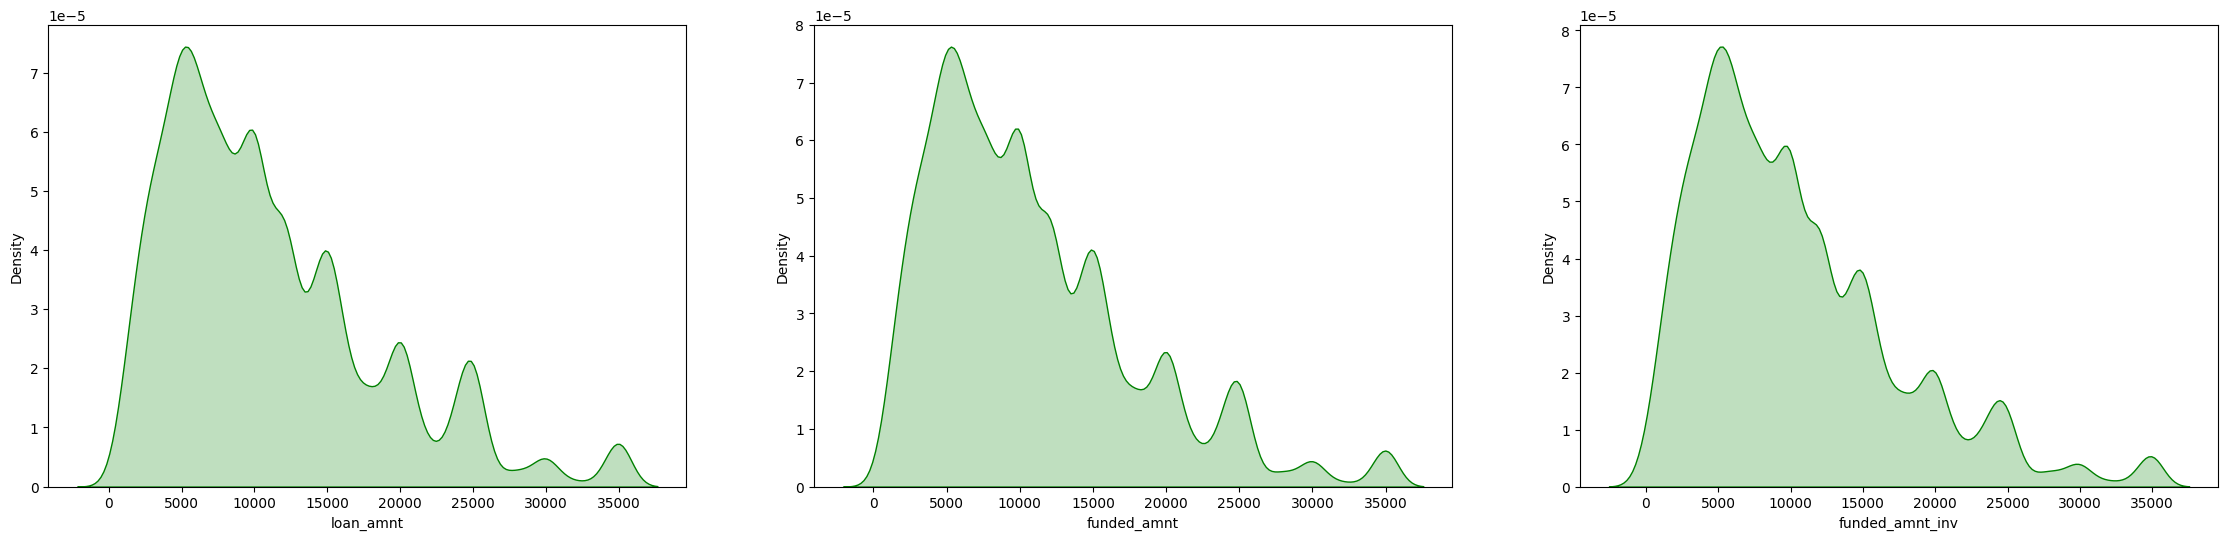

In [ ]:
# understanding the feature similarity

# creating plot,

fig = plt.figure(figsize=(28,6))
spec = fig.add_gridspec(1,3)
sec_1 = fig.add_subplot(spec[0,0])
sec_2 = fig.add_subplot(spec[0,1])
sec_3 = fig.add_subplot(spec[0,2])

# fig, (sec_1, sec_2, sec_3) = plt.subplots(1, 3, figsize=(28, 6))

# adding color prefernce
bg_color = 'white'
for selection in [fig, sec_1, sec_2, sec_3]:
  selection.set_facecolor(bg_color)

#plot graph

sec = [sec_1, sec_2, sec_3]
cen=0
for feature in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
  sns.kdeplot(data[feature],fill=True,color='green', ax = sec[cen])
  cen += 1
plt.show()

# Observation

* Density distribution for all the three features are similar. Hence, we can proceed forward to anlayse with any of the feature.
* Based on the nature by description we will proceed forward with "loan_amnt".

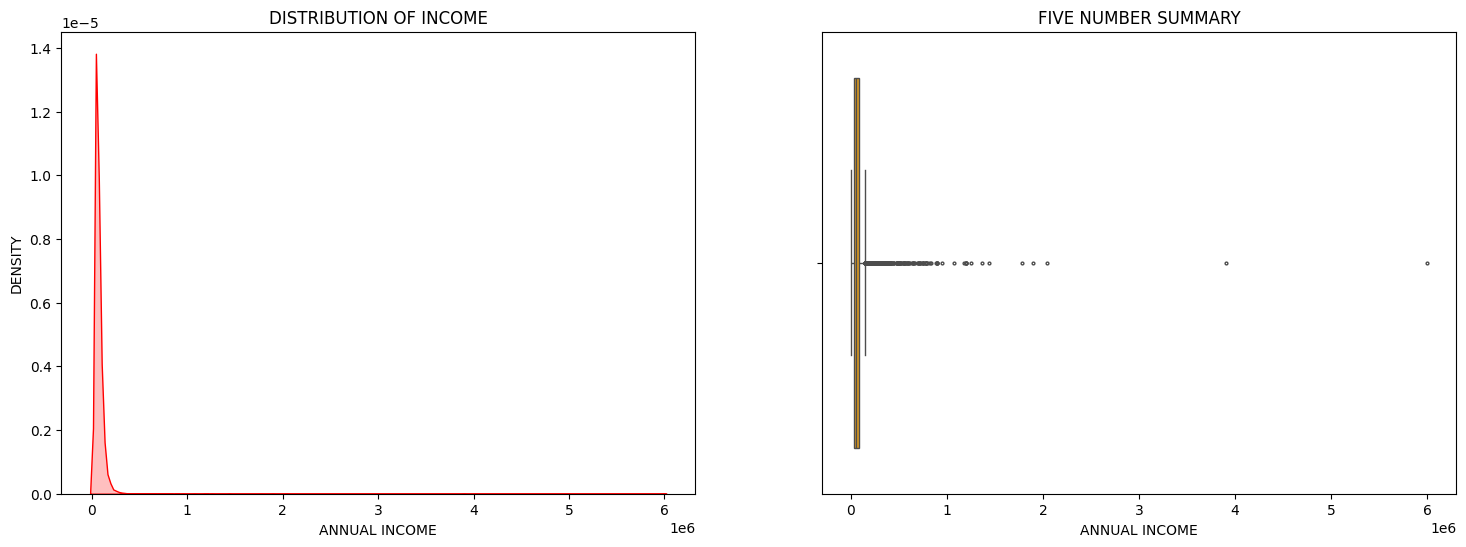

In [ ]:
# Analysing the annual income

# Distribution plot and outlier plot
# distribution plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
viz=sns.kdeplot(data['annual_inc'], fill=True, color='red')
viz.set_title('DISTRIBUTION OF INCOME')
viz.set_xlabel('ANNUAL INCOME')
viz.set_ylabel('DENSITY')

# outlier plot
plt.subplot(1,2,2)
viz = sns.boxplot(data['annual_inc'], color='orange', orient='h', fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY')
viz.set_xlabel('ANNUAL INCOME')
plt.show()

In [ ]:
# Numerical summary
print('Numerical Summary of annual_inc:')
print('Mean:',data['annual_inc'].mean())
print('Median:',data['annual_inc'].median())
print('75%:',data['annual_inc'].quantile(0.75))
print('90%:',data['annual_inc'].quantile(0.9))
print('95%:',data['annual_inc'].quantile(0.95))
print('99%:',data['annual_inc'].quantile(0.99))
print('100%:',data['annual_inc'].quantile(1))

Numerical Summary of annual_inc:
Mean: 68777.97368120901
Median: 58868.0
75%: 82000.0
90%: 115000.0
95%: 140004.0
99%: 234143.99999999878
100%: 6000000.0


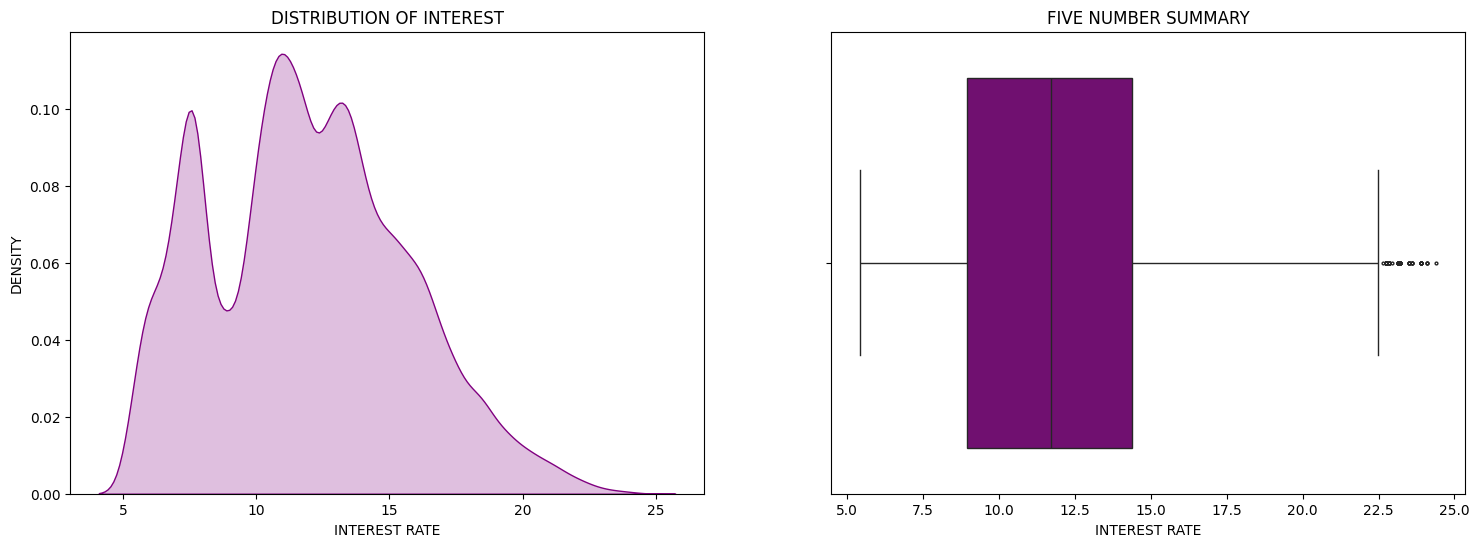

In [ ]:
# Analysing the interest rate column

# Distribution plot and outlier plot
# distribution plot
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
viz = sns.kdeplot(data['int_rate'], fill=True, color='purple')
viz.set_title('DISTRIBUTION OF INTEREST')
viz.set_xlabel('INTEREST RATE')
viz.set_ylabel('DENSITY')

# outlier plot
plt.subplot(1,2,2)
viz = sns.boxplot(data['int_rate'], orient='h', color='purple', fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY')
viz.set_xlabel('INTEREST RATE')
plt.show()

In [ ]:
# Numerical summary
data['int_rate'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

,int_rate
count,38577.000000
mean,11.932219
std,3.691327
min,5.420000
25%,8.940000
50%,11.710000
75%,14.380000
90%,16.820000
95%,18.312000
99%,20.990000


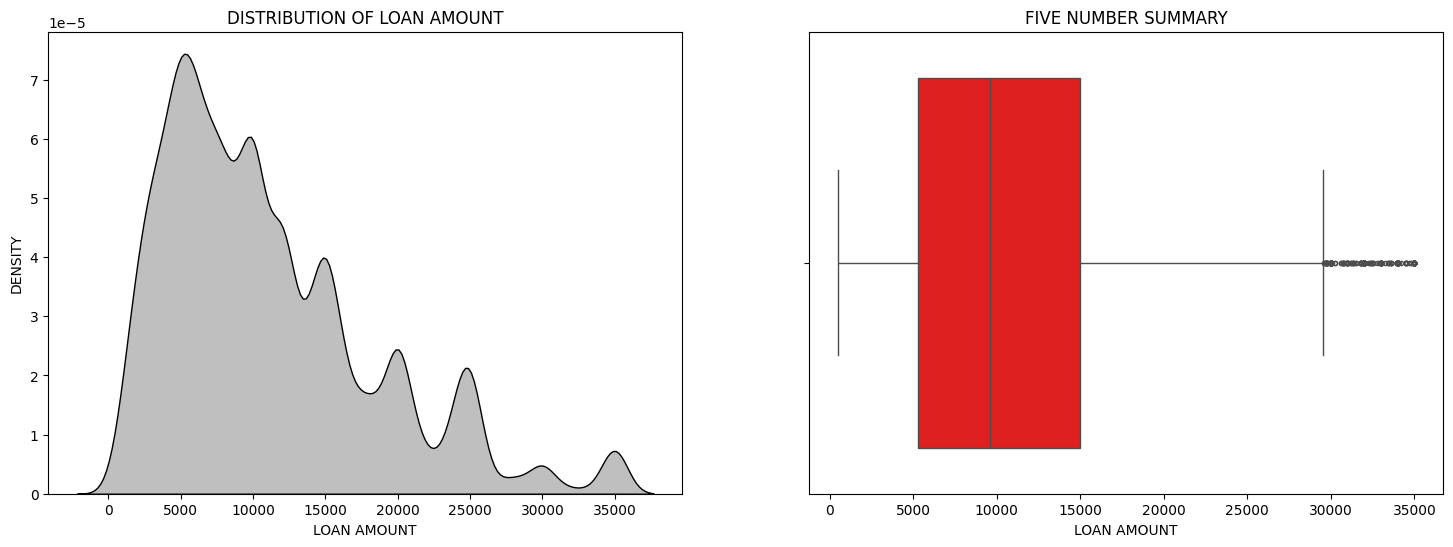

In [ ]:
# Univariate analysis on loan_amnt

# Distribution plot and outlier plot
# distribution plot
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
viz = sns.kdeplot(data['loan_amnt'], fill=True, color='black')
viz.set_title('DISTRIBUTION OF LOAN AMOUNT')
viz.set_xlabel('LOAN AMOUNT')
viz.set_ylabel('DENSITY')

# outlier plot
plt.subplot(1,2,2)
viz = sns.boxplot(data['loan_amnt'], orient='h', color='red', fliersize=3)
viz.set_title('FIVE NUMBER SUMMARY')
viz.set_xlabel('LOAN AMOUNT')
plt.show()

In [ ]:
# Numerical summary
print('Numerical Summary of loan_amnt:')
print('Mean:', data['loan_amnt'].mean())
print('Median:', data['loan_amnt'].quantile(0.5))
print('75%:', data['loan_amnt'].quantile(0.75))
print('90%:', data['loan_amnt'].quantile(0.9))
print('95%:', data['loan_amnt'].quantile(0.95))
print('99%:', data['loan_amnt'].quantile(0.99))
print('100%:', data['loan_amnt'].quantile(1))

Numerical Summary of loan_amnt:
Mean: 11047.02542966016
Median: 9600.0
75%: 15000.0
90%: 21600.0
95%: 25000.0
99%: 35000.0
100%: 35000.0


# Univariate analysis on loan year and month and tenure

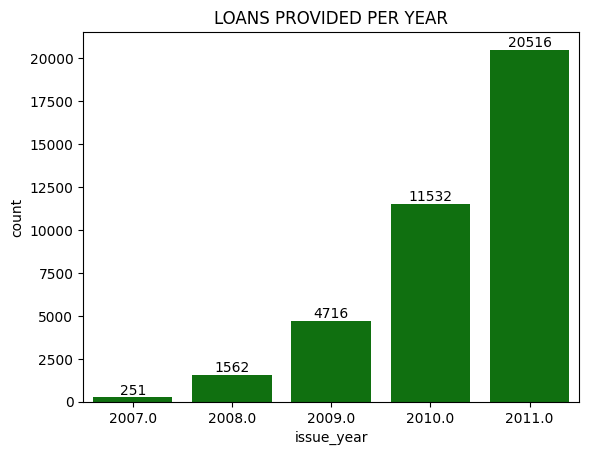

In [ ]:
# Create count plot for loan issued per year

ax = sns.countplot(x=data['issue_year'], color='green')
ax.bar_label(ax.containers[0])
ax.set_title('LOANS PROVIDED PER YEAR')
plt.show()

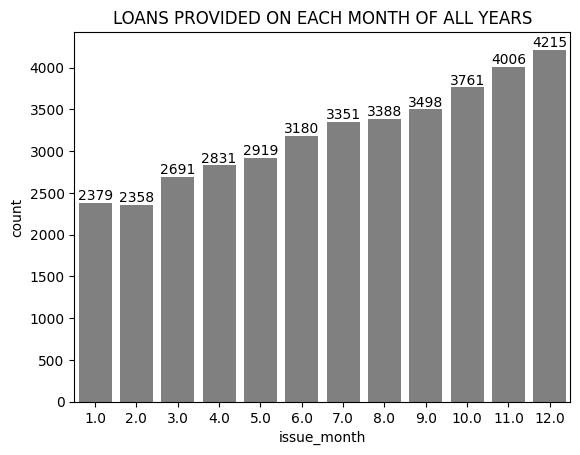

In [ ]:
# create count plot for loan issued on month basis cummulatively for all years

ax = sns.countplot(x=data['issue_month'], color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('LOANS PROVIDED ON EACH MONTH OF ALL YEARS')
plt.show()

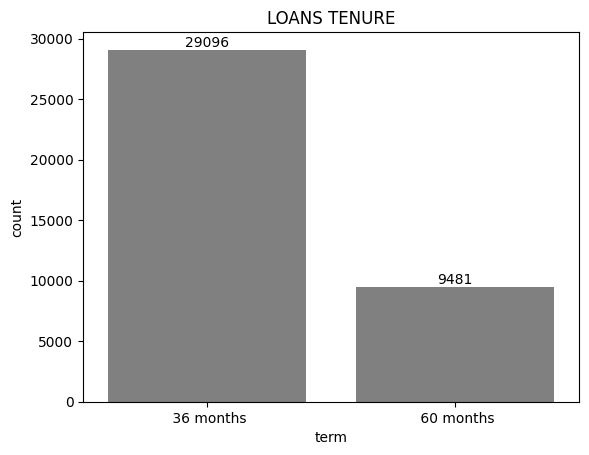

In [ ]:
# Creating the countplot for loan tenure

ax = sns.countplot(x=data['term'], color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('LOANS TENURE')
plt.show()

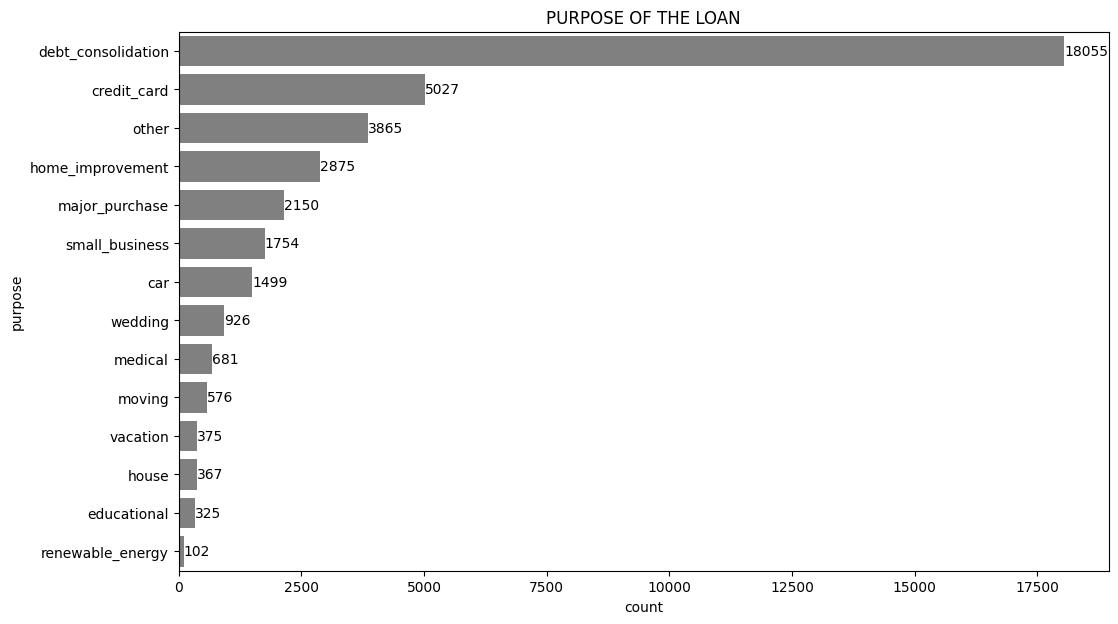

In [ ]:
# Creating the countplot for loan purpose

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=data['purpose'],
                   order= data['purpose'].value_counts().index,
                   color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('PURPOSE OF THE LOAN')
plt.show()

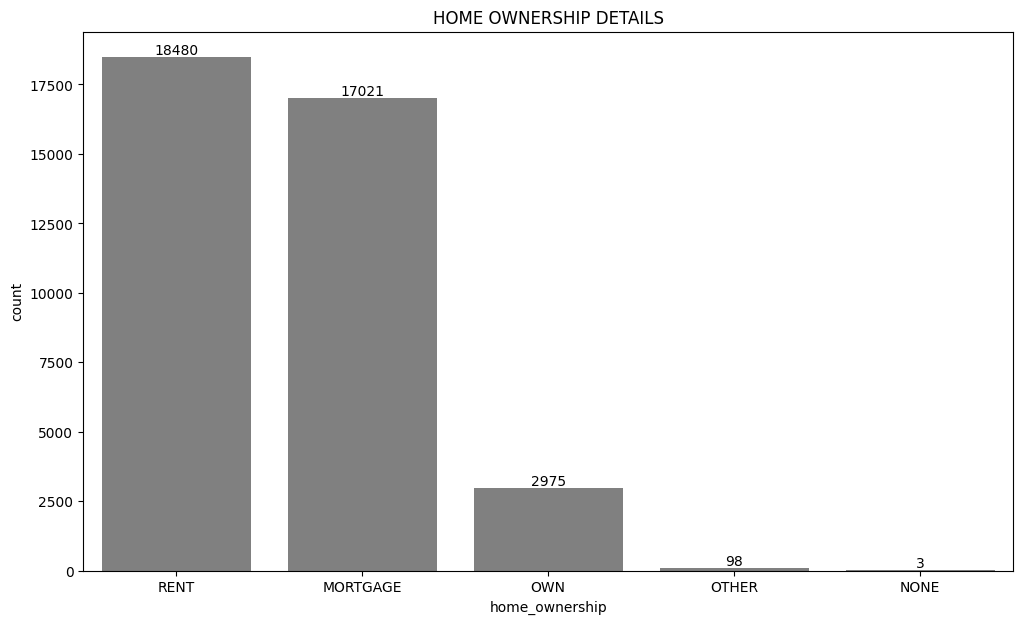

In [ ]:
# count plot for home ownership

plt.figure(figsize=(12, 7))
ax = sns.countplot(x = data['home_ownership'],
                   order = data['home_ownership'].value_counts().index,
                   color ='grey')
ax.bar_label(ax.containers[0])
ax.set_title('HOME OWNERSHIP DETAILS')
plt.show()

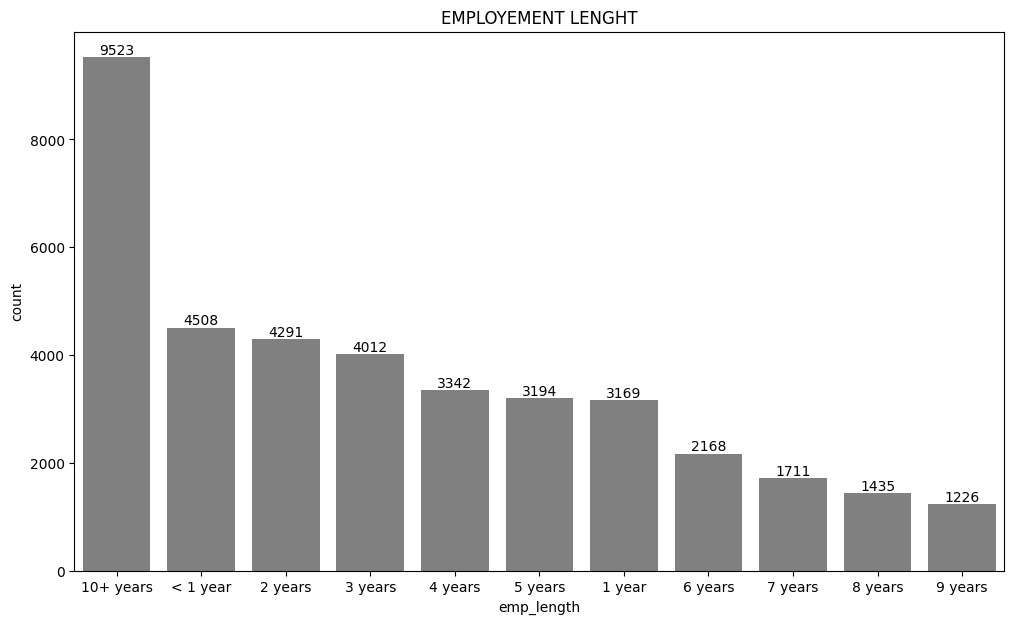

In [ ]:
# create countplot for emp_length

plt.figure(figsize=(12, 7))
ax = sns.countplot(x=data['emp_length'],
              order=data['emp_length'].value_counts().index,
              color='grey')
ax.bar_label(ax.containers[0])
ax.set_title('EMPLOYEMENT LENGHT')
plt.show()

# OBSERVATION ON UNIVARIATE ANALYSIS

* Looks like the 'annual_inc' has outliers on the upper fence.
* There is huge jump between 99 & 100 % of data in 'annual_inc' and that can be trimmed if we are going to build a ML Model
* The average interest_rate is 12% but there is huge jump after 90 percentile of data
* Most of the borrowers have been provided loan amount with interest rate between 9-14%
* Most of the borrowers prefer a loan amount between 5k to 15k
* There is outliers on the upper fence of 'loan_amount'
* For each year number of borrowers are increasing
* More loans are borrowed in Q4
* Most borrowers are opting for 36months tenure
* Most of the borrowings happens for debt_consolidation and credit_card repayment
* Very less borrowers has own house
* Cummulatively freshers (<= 3years) has borrowed more #loans than 10+ years of emp_lenth



```
# should not remove / treat outliers when doing EDA for data analysis
# outliers should be removed / treated as last step of EDA only if this data will be used for ML models
```



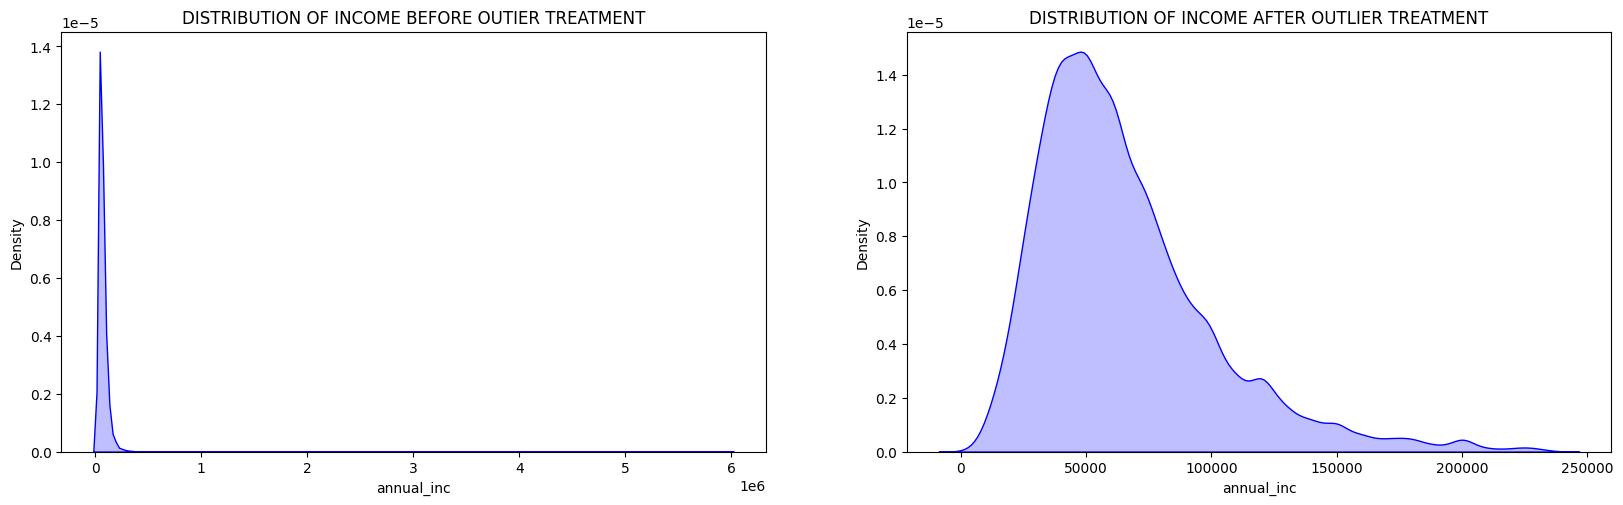

In [ ]:
# OUTLIER TREATMENT

# Distribution plot before outlier
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
ax = sns.kdeplot(data['annual_inc'], fill=True, color='blue')
ax.set_title('DISTRIBUTION OF INCOME BEFORE OUTIER TREATMENT')

# removing the outliers
data = data[data['annual_inc'] < data['annual_inc'].quantile(0.99)]

# Distribution plot after outlier
plt.subplot(2,2,2)
ax = sns.kdeplot(data['annual_inc'], fill=True, color='blue')
ax.set_title('DISTRIBUTION OF INCOME AFTER OUTLIER TREATMENT')
plt.show()

# Understanding the financial features

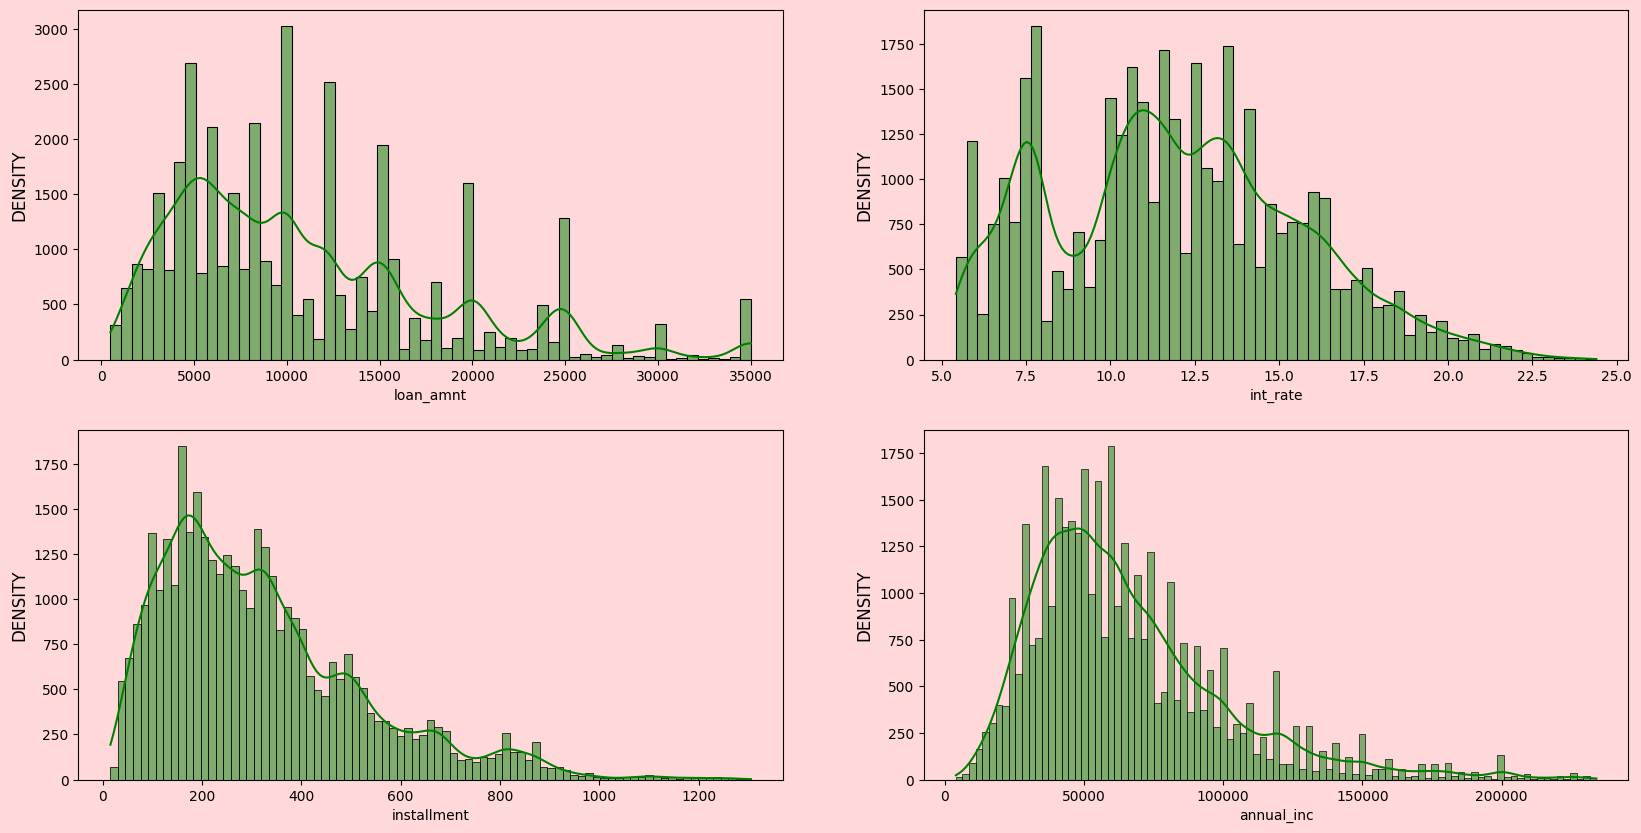

In [ ]:
# Creating plots
fig, axes = plt.subplots(2, 2, figsize=(20,10), facecolor='#ffd9d9')
axes = axes.flatten()

# Adding color preference
bg_color = '#ffd9d9'
for ax in axes:
    ax.set_facecolor(bg_color)

# Plotting the graph
features = ["loan_amnt", "int_rate", "installment", "annual_inc"]
for ax, feature in zip(axes, features):
    sns.histplot(data[feature], kde=True, ax=ax, color='green')
    ax.set_ylabel('DENSITY' , fontsize=12)

plt.show()

# Creating buckets for bi-variate analysis


In [ ]:
# Categorical bucket for loan_amount
data['loan_amnt_bkt'] = pd.cut(data['loan_amnt'],
                               list(range(0, 40000, 7000)),
                               labels=['0-7k', '7k-14k', '14k-21k', '21k-28k', '28k+'])

# categorical bucket for interest rate
data['int_rate_bkt'] = pd.cut(data['int_rate'],
                               list(range(5, 26, 5)),
                               labels=['5-10', '10-15', '15-20', '20+'])

# categorical bucket for annual income
data['annual_inc_bkt'] = pd.cut(data['annual_inc'],
                               list(range(0, 250001, 50000)),
                               labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])

# categorical bucket for installment
data['installment_bkt'] = pd.cut(data['installment'],
                               list(range(0, 1401, 200)),
                               labels=['0-200', '200-400', '400-600', '600-800',
                                       '800-1000', '1000-1200', '1200+'])

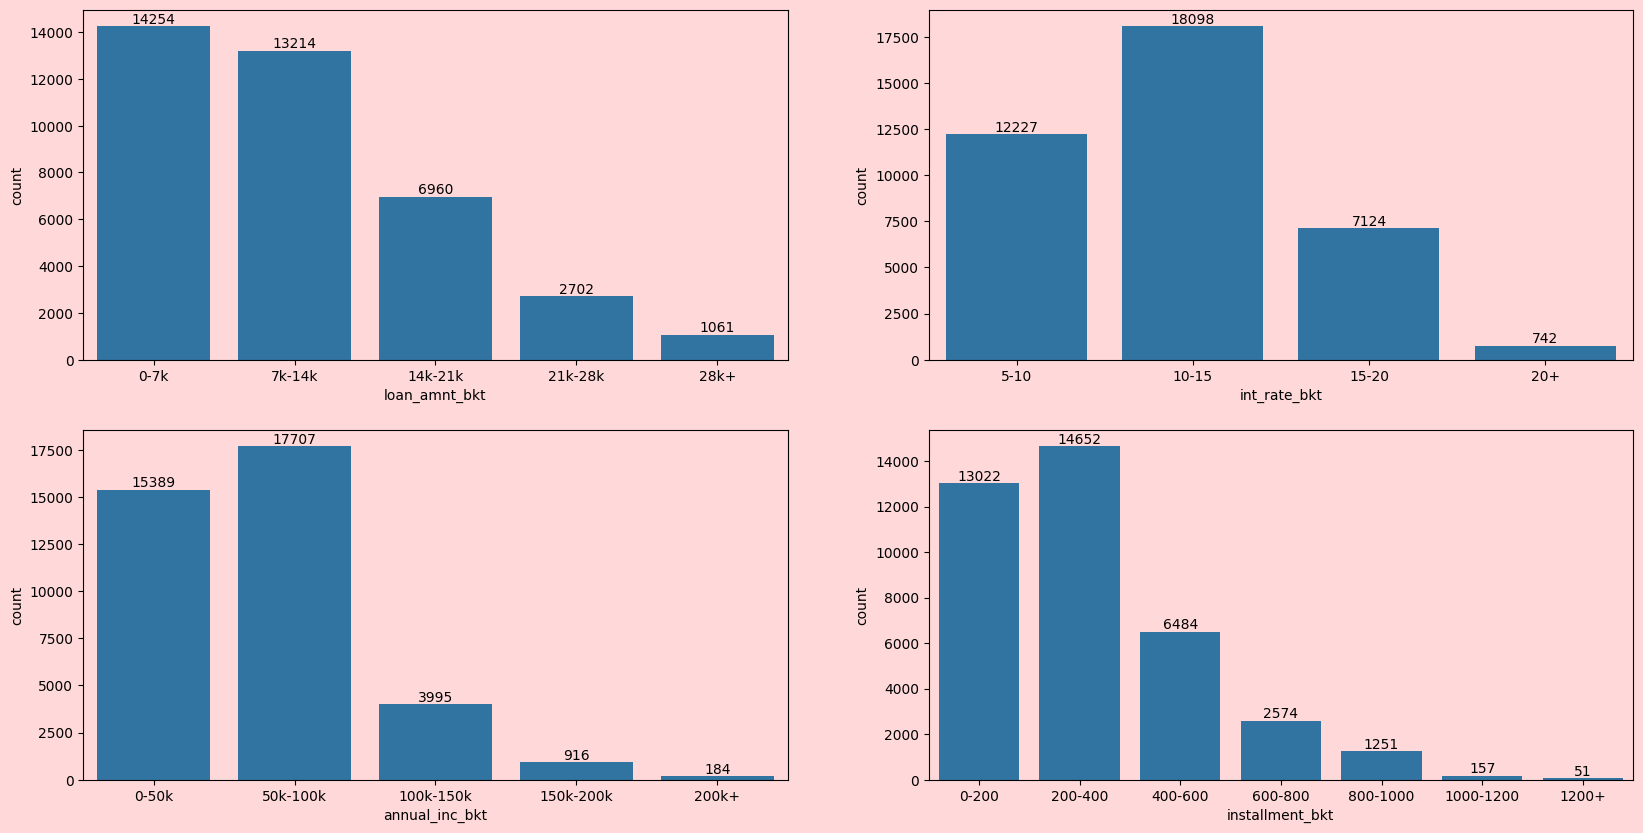

In [ ]:
# plot the bucket data information
fig, axes = plt.subplots(2, 2, figsize=(20,10), facecolor='#ffd9d9')
axes = axes.flatten()

# adding color preferences
for ax in axes:
    ax.set_facecolor('#ffd9d9')

# ploting the graphs
features = ['loan_amnt_bkt', 'int_rate_bkt', 'annual_inc_bkt', 'installment_bkt']
for ax, feature in zip(axes, features):
    pl = sns.countplot(x=data[feature], ax=ax)
    pl.bar_label(pl.containers[0])

plt.show()

# Multivariate Analysis

* Moving forward in bivariate analysis we just need the data of "Charged Off" borrowers.
* So, we create a new dataframe that has only "Charged Off" borrowers data.

In [ ]:
# creating a dataframe for charged off borrowers
co_data = data[data['loan_status']=='Charged Off']

# Looking for the nature of the data
print('Data Dimension:',co_data.shape)
print(f'Data has {co_data.shape[0]} Rows and {co_data.shape[1]} Columns')

Data Dimension: (5584, 29)
Data has 5584 Rows and 29 Columns


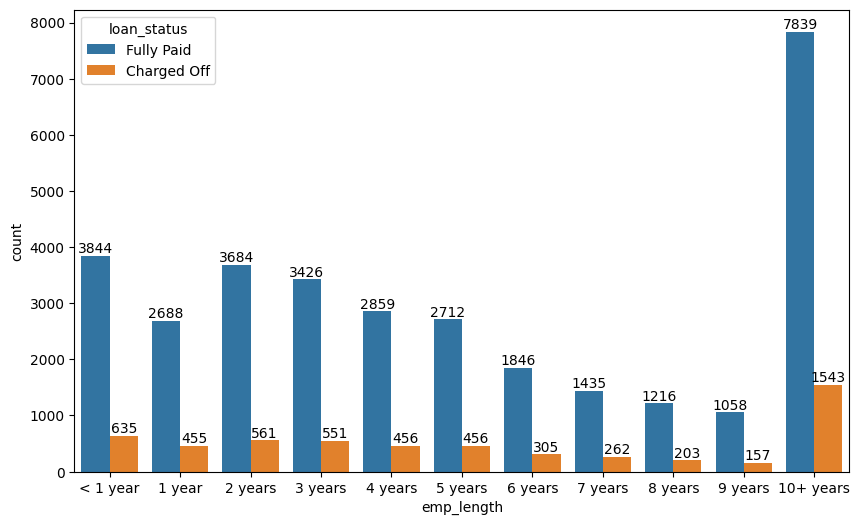

In [ ]:
# count plot for employement lenght by loan status as hue
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data['emp_length'],hue=data['loan_status'],order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                            '6 years', '7 years', '8 years', '9 years' , '10+ years' ])     #order=data['emp_length'].value_counts().index
for i in ax.containers:
  ax.bar_label(i)
plt.show()

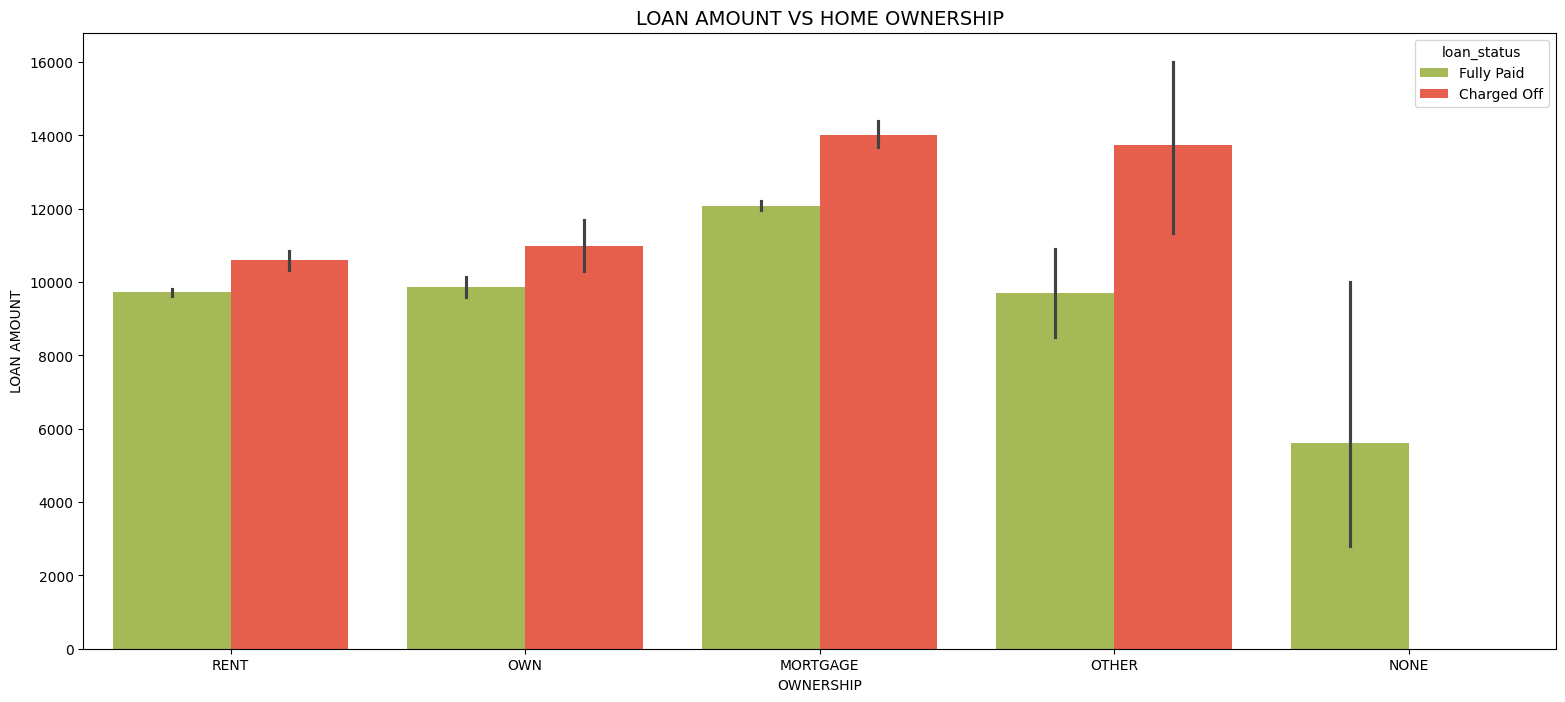

In [ ]:
# Bar plot for loan amount by home ownership

plt.figure(figsize=(19,8))
ax = sns.barplot(data=data,
            x='home_ownership',
            y='loan_amnt',
            hue='loan_status',
            palette=['#AECB46', "#FF4C33"])

# Naming the axis and title
ax.set_title('LOAN AMOUNT VS HOME OWNERSHIP',fontsize=14,color='black')
ax.set_xlabel('OWNERSHIP',fontsize =10,color = 'black')
ax.set_ylabel('LOAN AMOUNT',fontsize =10,color = 'black')
plt.show()

In [ ]:
co_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'total_pymnt_inv', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'loan_amnt_bkt', 'int_rate_bkt', 'annual_inc_bkt',
       'installment_bkt'],
      dtype='object')

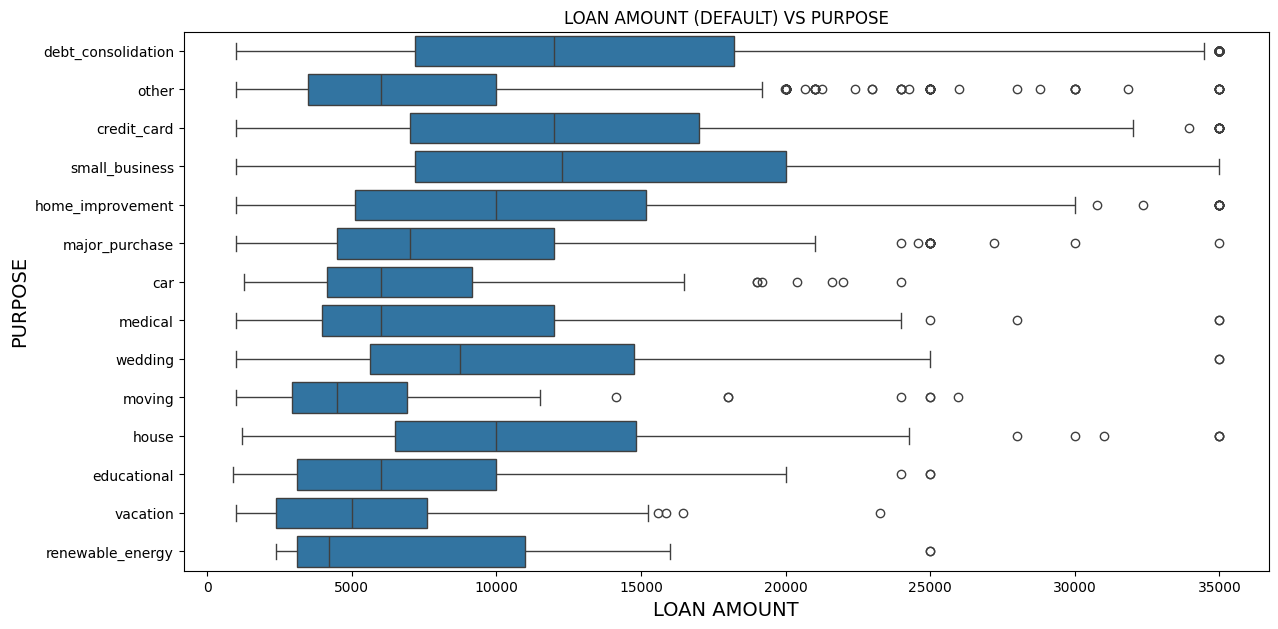

In [ ]:
# Box plot for loan amount vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt',
            y='purpose',
            order=co_data['purpose'].value_counts().index,
            data=co_data)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 14)
viz.set_ylabel('PURPOSE', fontsize = 14)
viz.set_title('LOAN AMOUNT (DEFAULT) VS PURPOSE')
plt.show()

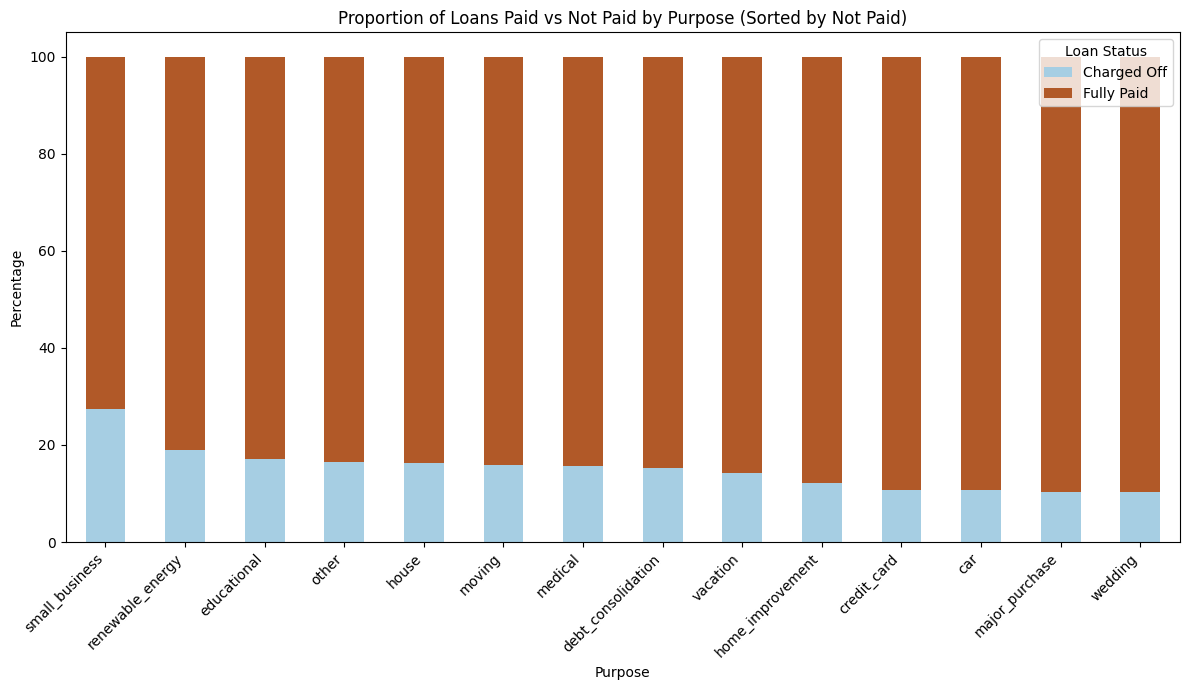

In [ ]:
# proportions
proportions = data.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# total loan for each purpose
proportions['total'] = proportions.sum(axis=1)

# calculate the proportions
proportions = proportions.div(proportions['total'], axis=0) * 100

# letes drop the total column
del proportions['total']

# arrange the data in dec order of charged off
proportions_sorted = proportions.sort_values(by='Charged Off', ascending=False)

# stacked bar plot
proportions_sorted.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')



plt.title('Proportion of Loans Paid vs Not Paid by Purpose (Sorted by Not Paid)')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.legend(title='Loan Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.show()


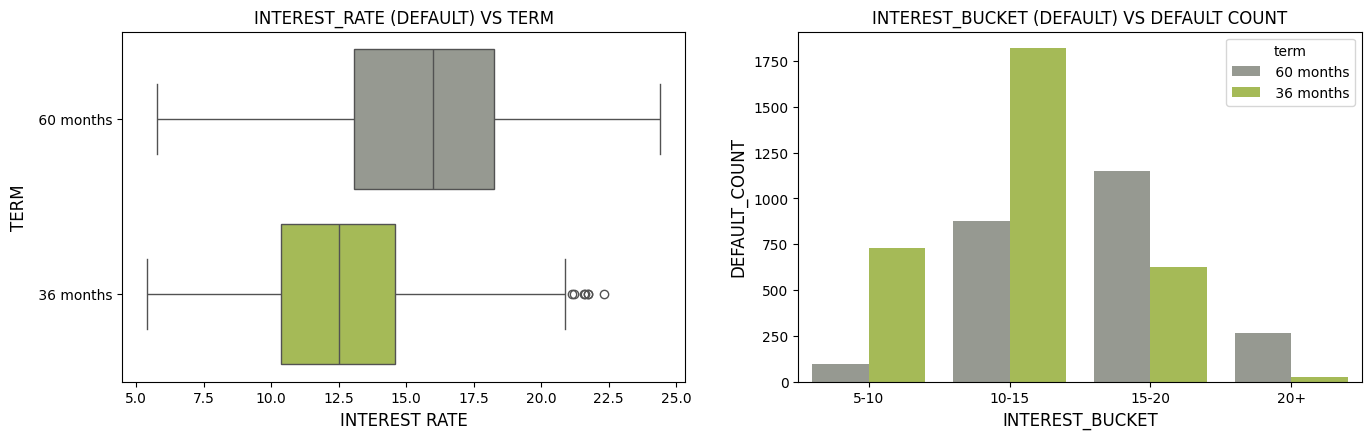

In [ ]:
# Box plot for interest rate vs term
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x=co_data['int_rate'],
            y=co_data['term'],
            orient = 'h',
            palette=['#979A90',"#AECB46"],
            )
# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 12)
viz.set_ylabel('TERM', fontsize = 12)
viz.set_title('INTEREST_RATE (DEFAULT) VS TERM')

# Count plot for interest rate vs default count by term as hue
plt.subplot(2,2,2)
viz = sns.countplot(x = 'int_rate_bkt',
              hue= 'term',
              palette=['#979A90', "#AECB46"],
              data = co_data)
# Naming the axis and title
viz.set_xlabel('INTEREST_BUCKET', fontsize = 12)
viz.set_ylabel('DEFAULT_COUNT', fontsize = 12)
viz.set_title('INTEREST_BUCKET (DEFAULT) VS DEFAULT COUNT')

plt.show()

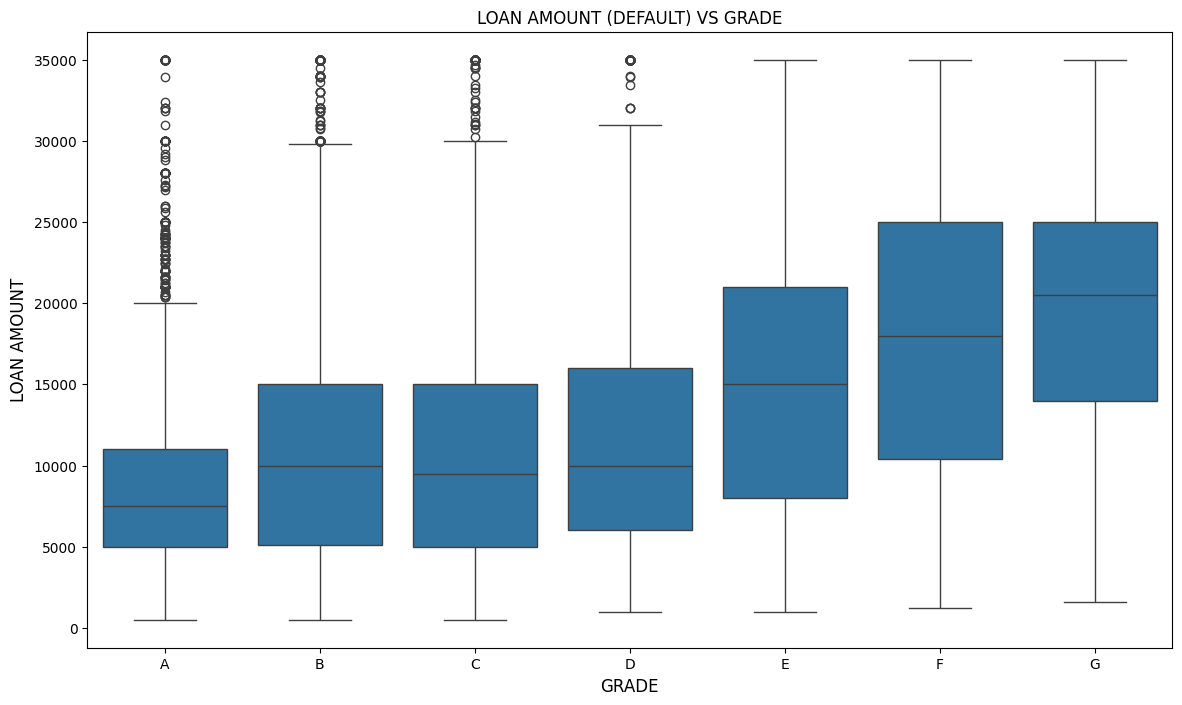

In [ ]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt',
            x='grade',
            order=['A','B','C','D','E','F','G'],
            data=data)

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 12)
viz.set_xlabel('GRADE', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE')
plt.show()

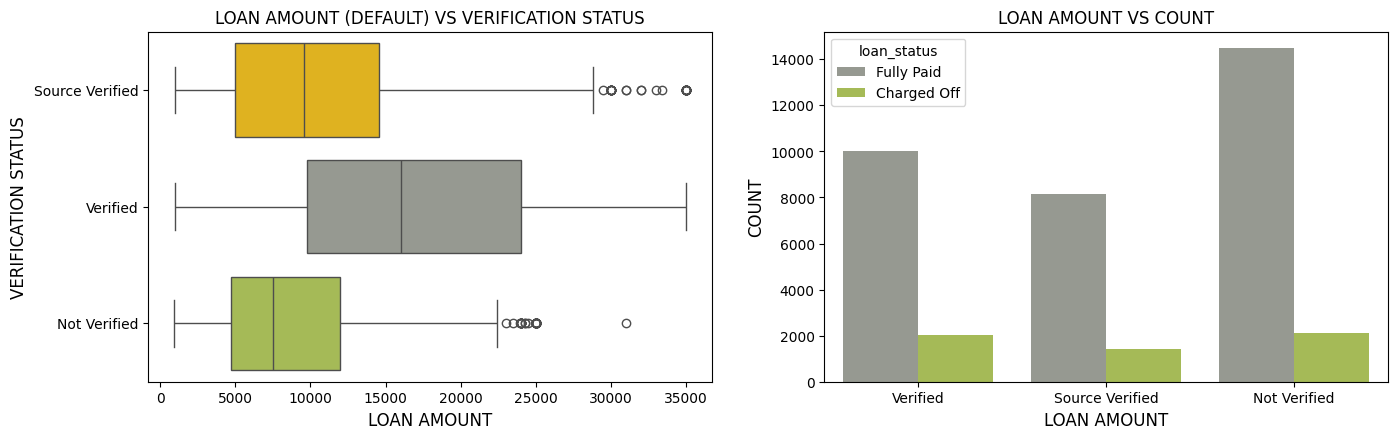

In [ ]:
# Box plot for loan amount vs verification status
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='loan_amnt',
            y='verification_status',
            orient='h',
            palette=["#FFC300", '#979A90', "#AECB46"],
            data=co_data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 12)
viz.set_ylabel('VERIFICATION STATUS', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS VERIFICATION STATUS')

# Count plot for verification status vs count by loan_status as hue
plt.subplot(2,2,2)
viz = sns.countplot(x = 'verification_status',
              hue= data['loan_status'].sort_values(),
              palette=['#979A90', "#AECB46"],
              data = data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 12)
viz.set_ylabel('COUNT', fontsize = 12)
viz.set_title('LOAN AMOUNT VS COUNT')
plt.show()

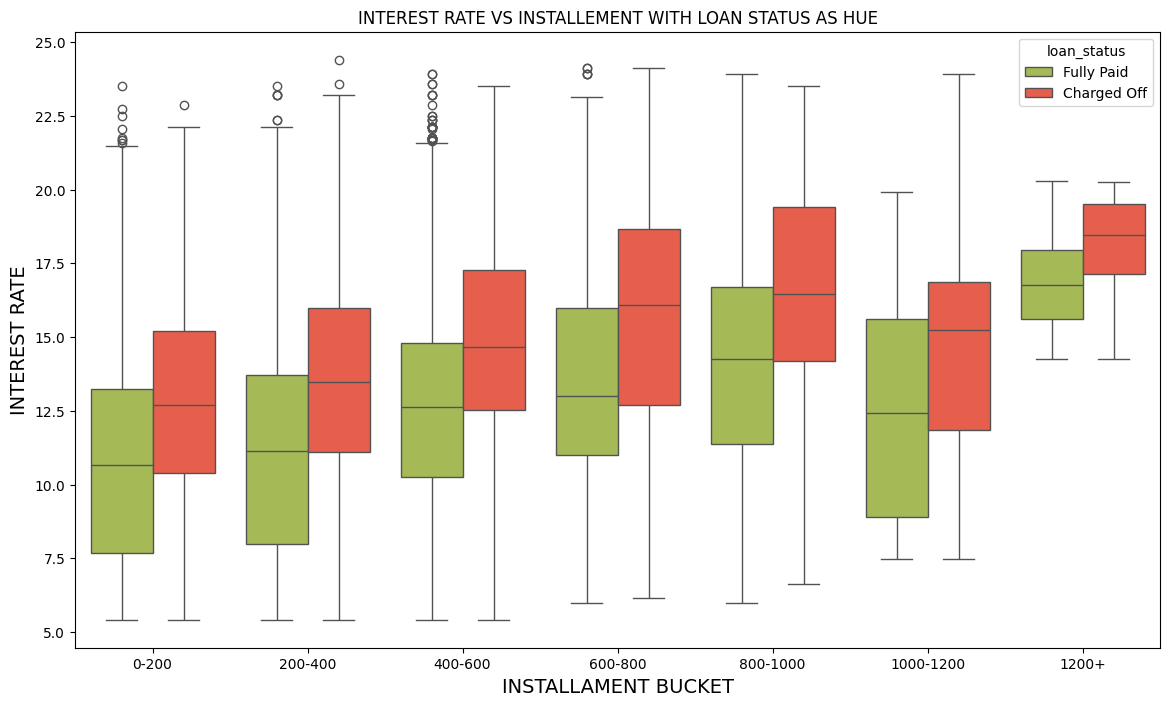

In [ ]:
# Box plot for installment bucket vs interest rate by loan status as hue
plt.figure(figsize=(14,8))
viz = sns.boxplot(x='installment_bkt',
            y='int_rate',
            hue = 'loan_status',
            palette=['#AECB46', "#FF4C33"],
            data=data)

# Naming the axis and title
viz.set_xlabel('INSTALLAMENT BUCKET', fontsize = 14)
viz.set_ylabel('INTEREST RATE', fontsize = 14)
viz.set_title('INTEREST RATE VS INSTALLEMENT WITH LOAN STATUS AS HUE')
plt.show()

# OBSERVATION ON MULTIVARIATE

* Borrowers with 10+ years of employment length are more likely to charge off.
* Borrowers living on mortgage with loan amount greater than 12k are likely to charge off.
* Loan for debt consolidation, credit card, small business with average loan amount greater than 12000 are more likely to default.
* Loan for small business has high proportions of charged off when compared to # loans issued.
* Loan with highest interest rate in all buckets are more likely to charge off.
* Loan provided for house, debt consolidation, small business with highest interest rate are more likely to charge off.
* Longer tenure has the higher interest rate and people in this term with interest rate between 15-20% is more likely to charge off.
* Shorter tenure has the lower interest rate and people in this term with interest rate between 10-15% is more likely to charge off.
* Borrower within grade E,F,G and with average loan amount greater than 15000 are more likely to charge off, but this is equally likely.
* Borrowers with verification status "not-verified" has loan amount with 5k to 12.5k are more likely to charge off.
* Borrowers with verification status "not-verified" and "verified" has a equal proportion in charge off.
* As the number of installment increase the borrowers with high interest rate (>13%) are more likely to charge off.

# DRIVING FACTORS TO CHARGE OFF
* Borrowers with high interest and 10+ years of employment length.
* Borrowers living on mortgage with loan amount greater than 12000.
* Loan for debt consolidation, credit card, small business with loan amount greater than 12000.
* For any loan amount provided with an average interest rate higher than 13%.
* Loan provided for house purpose with average interest greater than 15%.
* Loan provided with an average of 12.5% interest rate for 36months of tenure.
* Loan provided with an average of 16.5% interest rate for 60months of tenure.
* Average loan amount greater than 15000 with grade E, F, G (equally likely).
* Installments between 800 - 1200 with average interest greater than 15%.
* Average interest rate of 17% with installment greater than 1200.